# The evolution of house prices and GDP growth in Denmark

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2 SKAL MED??
plt.style.use('seaborn-whitegrid')
#import pydst SKAL MED????
#dst = pydst.Dst(lang='en') SKAL MED??

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading and cleaning data for GDP in Denmark from 2012-2022

The data for is downloaded from "Danmarks Statistik": NAN1 for GDP and EJ66 for HPI. 

In [107]:
#Loading data for GDP
df_gdp = pd.read_excel('GDP.xlsx', skiprows=2)

df_gdp.head()

,Unnamed: 0,Unnamed: 1,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,"Løbende priser, (mia. kr.)",1895.0,1929.7,1981.2,2036.4,2107.8,2193.0,2253.3,2311.0,2323.9,2504.2,2797.9
1,NaN,"2010-priser, kædede værdier, (mia. kr.)",1839.3,1856.5,1886.5,1930.7,1993.4,2049.6,2090.4,2121.6,2079.3,2180.3,2263.5
2,NaN,Realvækst i forhold til foregående periode (pct.),0.2,0.9,1.6,2.3,3.2,2.8,2.0,1.5,-2.0,4.9,3.8
3,NaN,"Pr. indbygger, løbende priser, (1000 kr.)",339.0,343.8,351.1,358.4,367.9,380.4,388.9,397.3,398.6,427.7,473.7
4,NaN,"Bidrag til realvækst i BNP, (procentpoint)",0.2,0.9,1.6,2.3,3.2,2.8,2.0,1.5,-2.0,4.9,3.8


In this project, I am only interested in examining real GDP growth. In addition to cleaning up the data set and giving titles, I remove all other rows that I will not use in this examination. 



In [108]:
#Cleaning data for GDP

#Giving a column title for the different units for GDP:
df_gdp.rename(columns={'Unnamed: 1': 'GDP unit'}, inplace=True)

#Removing the columns that is not used
del df_gdp['Unnamed: 0']

#Only keeping the GDP growth values
I = df_gdp['GDP unit'] == 'Realvækst i forhold til foregående periode (pct.)'
df_gdp = df_gdp[I]

#Dropping missing values
df_gdp = df_gdp.dropna()

df_gdp.head()


,GDP unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,Realvækst i forhold til foregående periode (pct.),0.2,0.9,1.6,2.3,3.2,2.8,2.0,1.5,-2.0,4.9,3.8




Then I transpose the data for GDP, such that the years are rows insted af of columns, and the values for GDP is listed in one column.

In [117]:
#Transposing the data
df_gdp_transposed = df_gdp.transpose()

#Showing the transposed dataframe
print(df_gdp_transposed)

                                                          2
GDP unit  Realvækst i forhold til foregående periode (pct.)
2012                                                    0.2
2013                                                    0.9
2014                                                    1.6
2015                                                    2.3
2016                                                    3.2
2017                                                    2.8
2018                                                    2.0
2019                                                    1.5
2020                                                   -2.0
2021                                                    4.9
2022                                                    3.8



Creating a line plot for the GDP growth.

In [110]:
#Creating lists to create a line plot
#x-axis
years_GDP = []

for year in range(2012, 2023):
    years_GDP.append(year)

#y-axis
GDP_growth = [0.2, 0.9, 1.6, 2.3, 3.2, 2.8, 2.0, 1.5, -2.0, 4.9, 3.8]

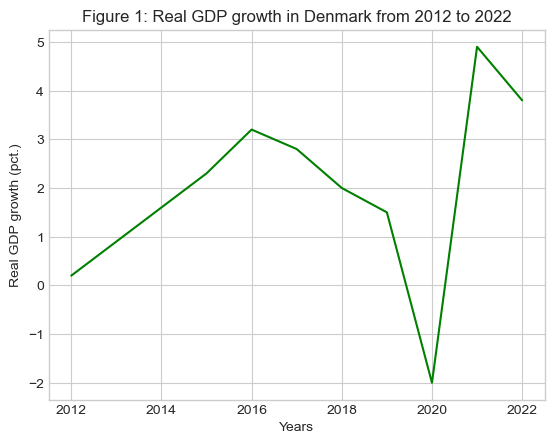

In [111]:
# creating a line plot
plt.plot(years_GDP, GDP_growth, linestyle='-', color='Green') 
plt.xlabel('Years') 
plt.ylabel('Real GDP growth (pct.)') 
plt.title('Figure 1: Real GDP growth in Denmark from 2012 to 2022') 
plt.show() 

# Loading and cleaning data for the House Price Index (HPI) in Denmark from 2012-2022

In [112]:
#Loading data for House Price Index (HPI)
df_hpi = pd.read_excel('HPI.xlsx', skiprows=2)
df_hpi.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Enfamiliehuse,Indeks,Hele landet,85.1,87.4,90.4,95.8,99.6,103.6,107.6,110.8,116.1,128.2,129.2
1,NaN,Indeks,Landsdel Byen København,79.5,85.7,93.3,101.5,109.4,115.4,122.6,125.4,134.2,152.3,158.6
2,NaN,Indeks,Landsdel Københavns omegn,77.6,83.1,88.0,95.1,101.8,107.3,112.3,116.5,124.1,143.3,145.1
3,NaN,Indeks,Landsdel Nordsjælland,72.1,74.2,76.3,82.8,86.2,90.5,95.2,98.7,104.4,121.0,125.6
4,NaN,Indeks,Landsdel Bornholm,84.7,82.9,82.0,84.0,91.6,101.1,107.1,111.1,122.0,143.1,143.4


Again, I am only interested in examining real growth in HPI. So I remove all other rows that I will not use in this examination. 

In [113]:
#Cleaning data for HPI

#Giving a column title for the "Landsdele":
df_hpi.rename(columns={'Unnamed: 2': 'Landsdel'}, inplace=True)

#Giving a column title for the units of HPI:
df_hpi.rename(columns={'Unnamed: 1': 'HPI unit'}, inplace=True)

#Removing the columns that is not used
del df_hpi['Unnamed: 0']

#Only keeping the HPI growth values instead of the index
I = df_hpi['HPI unit'] == 'Ændring i forhold til året før (pct.)'
df_hpi = df_hpi[I]

df_hpi.head()


,HPI unit,Landsdel,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
12,Ændring i forhold til året før (pct.),Hele landet,-3.4,2.7,3.4,6.0,4.0,4.0,3.9,3.0,4.8,10.4,0.8
13,Ændring i forhold til året før (pct.),Landsdel Byen København,-2.5,7.8,8.9,8.8,7.8,5.5,6.2,2.3,7.0,13.5,4.1
14,Ændring i forhold til året før (pct.),Landsdel Københavns omegn,-3.8,7.1,5.9,8.1,7.0,5.4,4.7,3.7,6.5,15.5,1.3
15,Ændring i forhold til året før (pct.),Landsdel Nordsjælland,-3.5,2.9,2.8,8.5,4.1,5.0,5.2,3.7,5.8,15.9,3.8
16,Ændring i forhold til året før (pct.),Landsdel Bornholm,-4.4,-2.1,-1.1,2.4,9.0,10.4,5.9,3.7,9.8,17.3,0.2


Since I'm only interested in examining the HPI across the whole country, I remove the other rows, that shows the HPI for teh different regions (landsdele) in Denmark.

In [114]:
#Only keeping the HPI growth values for the whole country (Hele landet)
I = df_hpi['Landsdel'] == 'Hele landet'
df_hpi = df_hpi[I]

df_hpi.head()

,HPI unit,Landsdel,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
12,Ændring i forhold til året før (pct.),Hele landet,-3.4,2.7,3.4,6.0,4.0,4.0,3.9,3.0,4.8,10.4,0.8


Then I transpose the data for HPI, such that the years are rows insted af of columns, and the values for HPI is listed in one column.

In [116]:
#Transposing the data
df_hpi_transposed = df_hpi.transpose()

#Showing the transposed dataframe
print(df_hpi_transposed)

                                             12
HPI unit  Ændring i forhold til året før (pct.)
Landsdel                            Hele landet
2012                                       -3.4
2013                                        2.7
2014                                        3.4
2015                                        6.0
2016                                        4.0
2017                                        4.0
2018                                        3.9
2019                                        3.0
2020                                        4.8
2021                                       10.4
2022                                        0.8



Creating a line plot of the Real Growth in HPI

In [118]:
#Creating lists to create a line plot
#x-axis
years_HPI = []

for year in range(2012, 2023):
    years_HPI.append(year)

#y-axis
HPI_growth = [-3.4, 2.7, 3.4, 6.0, 4.0, 4.0, 3.9, 3.0, 4.8, 10.4, 0.8]

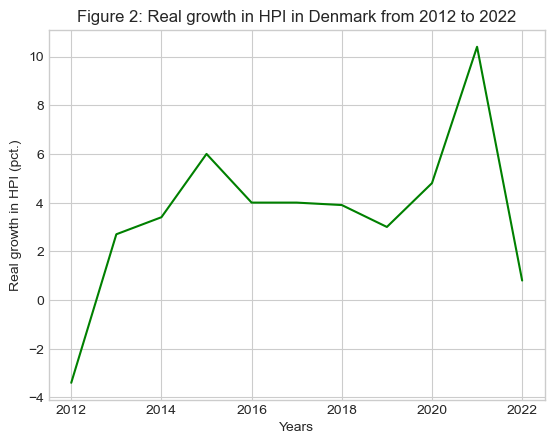

In [119]:
# creating a line plot
plt.plot(years_HPI, HPI_growth, linestyle='-', color='Green') 
plt.xlabel('Years') 
plt.ylabel('Real growth in HPI (pct.)') 
plt.title('Figure 2: Real growth in HPI in Denmark from 2012 to 2022') 
plt.show() 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION. 